In [2]:
library(tidyverse)
ggplot2::theme_set(theme_bw())

library(showtext)
font_add("nanum", "NanumGothic.ttf")
showtext_auto()

setwd("C:/Soongsil/R/Textmining")

### 03-01 단어 빈도 비교

In [3]:
raw_moon <- readLines("speech_moon.txt", encoding = "UTF-8")
moon <- raw_moon %>%
  as_tibble() %>%
  mutate(president = "moon")

In [5]:
raw_park <- readLines("speech_park.txt", encoding = "UTF-8")
park <- raw_park %>%
  as_tibble() %>%
  mutate(president = "park")

In [9]:
print(moon) ; print(park)

# A tibble: 117 x 2
   value                                                               president
   <chr>                                                               <chr>    
 1 "정권교체 하겠습니다!"                                              moon     
 2 "  정치교체 하겠습니다!"                                            moon     
 3 "  시대교체 하겠습니다!"                                            moon     
 4 "  "                                                                moon     
 5 "  ‘불비불명(不飛不鳴)’이라는 고사가 있습니다. 남쪽 언덕 나뭇가~    moon     
 6 ""                                                                  moon     
 7 "그 동안 정치와 거리를 둬 왔습니다. 그러나 암울한 시대가 저를 정치~ moon     
 8 ""                                                                  moon     
 9 ""                                                                  moon     
10 "‘우리나라 대통령’이 되겠습니다."                                   moon     
# ... with 107 more rows
# A tibble: 96 x 2
   value                                                

### ```bind_rows``` : 데이터 합치기 (rbind)

In [6]:
bind_speeches <- bind_rows(moon, park) %>%
    select(president, value)

In [10]:
print(bind_speeches)

# A tibble: 213 x 2
   president value                                                              
   <chr>     <chr>                                                              
 1 moon      "정권교체 하겠습니다!"                                             
 2 moon      "  정치교체 하겠습니다!"                                           
 3 moon      "  시대교체 하겠습니다!"                                           
 4 moon      "  "                                                               
 5 moon      "  ‘불비불명(不飛不鳴)’이라는 고사가 있습니다. 남쪽 언덕 나뭇가~   
 6 moon      ""                                                                 
 7 moon      "그 동안 정치와 거리를 둬 왔습니다. 그러나 암울한 시대가 저를 정치~
 8 moon      ""                                                                 
 9 moon      ""                                                                 
10 moon      "‘우리나라 대통령’이 되겠습니다."                                  
# ... with 203 more rows


In [16]:
bind_speeches <- rbind(moon, park) %>% 
    select(president, value)
print(bind_speeches)

# A tibble: 213 x 2
   president value                                                              
   <chr>     <chr>                                                              
 1 moon      "정권교체 하겠습니다!"                                             
 2 moon      "  정치교체 하겠습니다!"                                           
 3 moon      "  시대교체 하겠습니다!"                                           
 4 moon      "  "                                                               
 5 moon      "  ‘불비불명(不飛不鳴)’이라는 고사가 있습니다. 남쪽 언덕 나뭇가~   
 6 moon      ""                                                                 
 7 moon      "그 동안 정치와 거리를 둬 왔습니다. 그러나 암울한 시대가 저를 정치~
 8 moon      ""                                                                 
 9 moon      ""                                                                 
10 moon      "‘우리나라 대통령’이 되겠습니다."                                  
# ... with 203 more rows


### 기본적 전처리 및 토큰화

In [24]:
speeches <- bind_speeches %>%
  mutate(value = str_replace_all(value, "[^가-힣]", " ") %>%
             str_squish())

speeches %>% print

# A tibble: 213 x 2
   president value                                                              
   <chr>     <chr>                                                              
 1 moon      "정권교체 하겠습니다"                                              
 2 moon      "정치교체 하겠습니다"                                              
 3 moon      "시대교체 하겠습니다"                                              
 4 moon      ""                                                                 
 5 moon      "불비불명 이라는 고사가 있습니다 남쪽 언덕 나뭇가지에 앉아 년 동안~
 6 moon      ""                                                                 
 7 moon      "그 동안 정치와 거리를 둬 왔습니다 그러나 암울한 시대가 저를 정치~ 
 8 moon      ""                                                                 
 9 moon      ""                                                                 
10 moon      "우리나라 대통령 이 되겠습니다"                                    
# ... with 203 more rows


In [25]:
library(tidytext)
library(KoNLP)

Checking user defined dictionary!




In [26]:
speeches <- speeches %>%
    unnest_tokens(input = value,
                 output = word,
                 token = extractNoun)

In [27]:
speeches %>% print

# A tibble: 2,997 x 2
   president word      
   <chr>     <chr>     
 1 moon      "정권교체"
 2 moon      "하겠습니"
 3 moon      "정치"    
 4 moon      "교체"    
 5 moon      "하겠습니"
 6 moon      "시대"    
 7 moon      "교체"    
 8 moon      "하겠습니"
 9 moon      ""        
10 moon      "불비불명"
# ... with 2,987 more rows


In [28]:
frequency <- speeches %>%
    count(president, word) %>%
    filter(str_count(word) > 1)

frequency %>% print

# A tibble: 1,131 x 3
   president word         n
   <chr>     <chr>    <int>
 1 moon      가동         1
 2 moon      가사         1
 3 moon      가슴         2
 4 moon      가족         1
 5 moon      가족구조     1
 6 moon      가지         4
 7 moon      가치         3
 8 moon      각종         1
 9 moon      감당         1
10 moon      강력         3
# ... with 1,121 more rows


### ```slice_max()``` : 자주 사용된 단어 추출
- ```with_ties``` : ```TRUE``` : 동순위 허용, ```FALSE``` : 동순위 허용X

In [42]:
top10 <- frequency %>%
    group_by(president) %>%
    slice_max(n, n = 10, with_ties = FALSE)

top10

president,word,n
<chr>,<chr>,<int>
moon,국민,21
moon,일자리,21
moon,나라,19
moon,우리,17
moon,경제,15
moon,사회,14
moon,성장,13
moon,대통령,12
moon,정치,12


### ```facet_wrap()``` : 변수 항목별 그래프
- ```scales = "free_y"``` : y축 통일하지 않음, (```"free"``` : x축과 y축의 크기를 모두 그래프별로 설정)

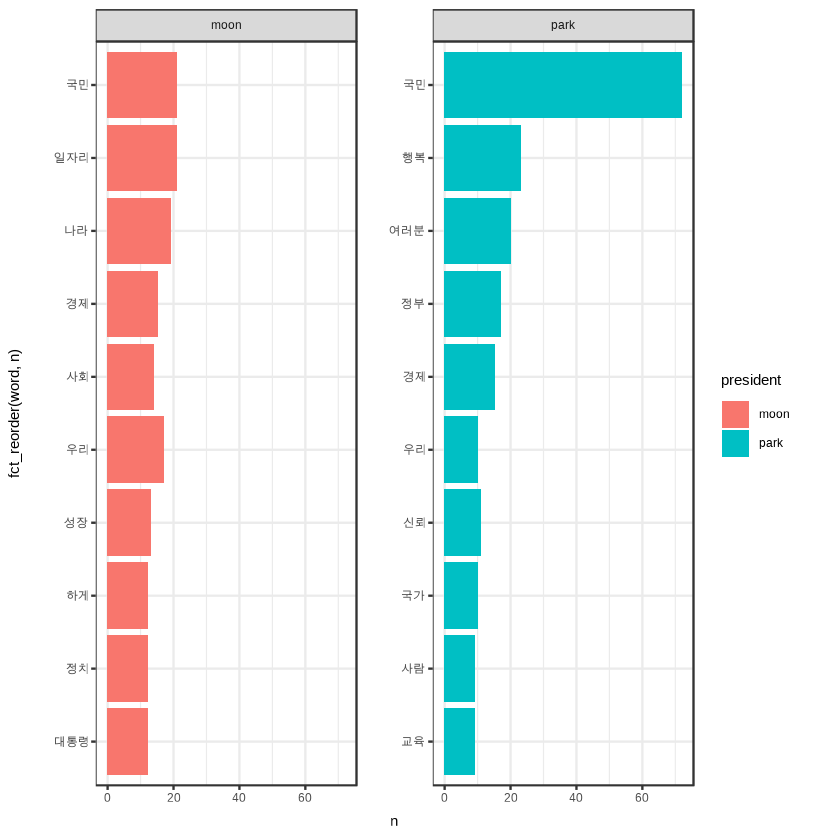

In [45]:
ggplot(top10, aes(x = fct_reorder(word, n),
                 y = n,
                 fill = president)) + 
    geom_col() + 
    coord_flip() + 
    facet_wrap(~ president, scales = "free_y")

### 특정 단어 제거하고 그래프

In [50]:
top10 <- frequency %>%
    filter(word != "국민") %>%
    group_by(president) %>%
    slice_max(n, n = 10, with_ties = F)

### ```reorder_within()``` : 축 순서를 변수의 항목별로 따로 
- ```x``` : 축
- ```by``` : 정렬 기준
- ```within``` : 그래프를 나누는 기준

### ```scale_x_reordered()``` : 축 이름 설정

Warning message in file.rename(tmp, destfile):
"cannot rename file 'C:\tmp\RtmpGSSLcG\ea8Aad44WunzF9a-dL6toA8r8nqVIXSkH-Hc.ttf.curltmp' to 'C:\tmp\RtmpGSSLcG\ea8Aad44WunzF9a-dL6toA8r8nqVIXSkH-Hc.ttf', reason '액세스가 거부되었습니다'"


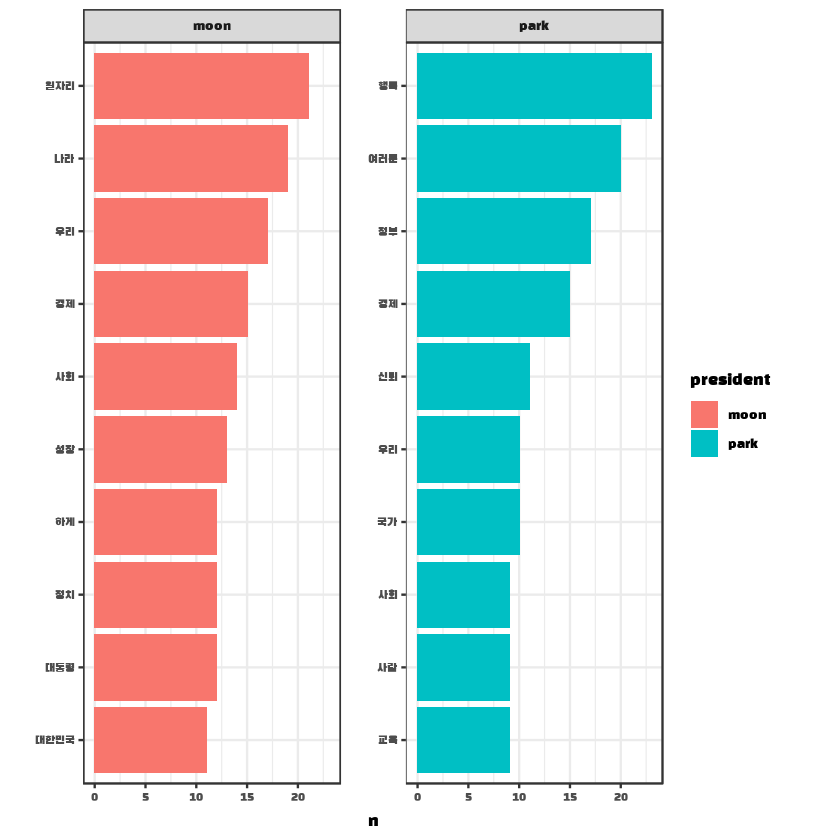

In [59]:
font_add_google(name = "Black Han Sans", family = "blackhansans")
showtext_auto()

ggplot(top10, aes(x = reorder_within(word, n, president),
                 y = n,
                 fill = president)) + 
    geom_col() + 
    coord_flip() + 
    facet_wrap(~ president, scales = "free_y") + 
    scale_x_reordered() + 
    theme(text = element_text(family = "blackhansans"),
         axis.title.y = element_blank())

### 03-02 오즈비 - 상대적으로 중요한 단어 비교

In [60]:
df_long <- frequency %>%
    group_by(president) %>%
    slice_max(n , n = 10) %>%
    filter(word %in% c("국민", "우리", "정치", "행복"))

In [61]:
df_long %>% print

# A tibble: 6 x 3
# Groups:   president [2]
  president word      n
  <chr>     <chr> <int>
1 moon      국민     21
2 moon      우리     17
3 moon      정치     12
4 park      국민     72
5 park      행복     23
6 park      우리     10


### ```pivot_wider()``` : long form 데이터를 가로로 넓은 wide form 데이터로 변형
- ```names_form``` : 변수명으로 만들 값이 들어있는 변수
- ```values_from``` : 변수에 채워 넣을 값이 들어 있는 변수
- ```values_fill``` : 채워 넣을 값

In [62]:
library(tidyr)

In [64]:
df_wide <- df_long %>%
    pivot_wider(names_from = president,
               values_from = n,
               values_fill = c(0))

df_wide %>% print

# A tibble: 4 x 3
  word   moon  park
  <chr> <int> <int>
1 국민     21    72
2 우리     17    10
3 정치     12     0
4 행복      0    23


In [93]:
frequency_wide <- frequency %>%
    pivot_wider(names_from = president,
               values_from = n,
               values_fill = c(0))

frequency_wide %>% print

# A tibble: 955 x 3
   word      moon  park
   <chr>    <int> <int>
 1 가동         1     0
 2 가사         1     0
 3 가슴         2     0
 4 가족         1     1
 5 가족구조     1     0
 6 가지         4     0
 7 가치         3     1
 8 각종         1     0
 9 감당         1     0
10 강력         3     0
# ... with 945 more rows


### 오즈비 구하기
오즈비 : 어떤 사건이 A 조건에서 발생할 확률이 B조건에서 발생할 화귤에 비해 얼마나 더 큰지 나타냄

#### 1. 단어의 비중을 나타낸 변수 추가
- 어떤 단어가 전혀 사용되지 않아 빈도가 0이면 오즈비가 0이 됨으로, 빈도가 0보다 큰 값이 되도록 모든값에 1을 더해줌

#### 2. 오즈비 변수 추가

$$
odds \;ratio = {{({n+1 \over total+1})_{Text \;A}} \over {({n+1 \over total+1})_{Text \; B}}}
$$

In [97]:
frequency_wide <- frequency_wide %>%
  mutate(ratio_moon = ((moon + 1)/(sum(moon + 1))),  # moon에서 단어의 비중
         ratio_park = ((park + 1)/(sum(park + 1))),  # park에서 단어의 비중
         odds_ratio = (ratio_moon / ratio_park)) %>%
    arrange(-odds_ratio)
        
frequency_wide %>% print

# A tibble: 955 x 6
   word      moon  park ratio_moon ratio_park odds_ratio
   <chr>    <int> <int>      <dbl>      <dbl>      <dbl>
 1 복지국가     8     0    0.00393   0.000552       7.12
 2 세상         6     0    0.00306   0.000552       5.54
 3 여성         6     0    0.00306   0.000552       5.54
 4 정의         6     0    0.00306   0.000552       5.54
 5 강자         5     0    0.00262   0.000552       4.75
 6 공평         5     0    0.00262   0.000552       4.75
 7 대통령의     5     0    0.00262   0.000552       4.75
 8 보통         5     0    0.00262   0.000552       4.75
 9 상생         5     0    0.00262   0.000552       4.75
10 지방         5     0    0.00262   0.000552       4.75
# ... with 945 more rows


### 상대적으로 중요한 단어 추출

In [98]:
top10 <- frequency_wide %>%
    filter(rank(odds_ratio) <= 10 | rank(-odds_ratio) <= 10)

top10 %>%
    arrange(-odds_ratio) %>% print

# A tibble: 20 x 6
   word      moon  park ratio_moon ratio_park odds_ratio
   <chr>    <int> <int>      <dbl>      <dbl>      <dbl>
 1 복지국가     8     0   0.00393    0.000552     7.12  
 2 세상         6     0   0.00306    0.000552     5.54  
 3 여성         6     0   0.00306    0.000552     5.54  
 4 정의         6     0   0.00306    0.000552     5.54  
 5 강자         5     0   0.00262    0.000552     4.75  
 6 공평         5     0   0.00262    0.000552     4.75  
 7 대통령의     5     0   0.00262    0.000552     4.75  
 8 보통         5     0   0.00262    0.000552     4.75  
 9 상생         5     0   0.00262    0.000552     4.75  
10 지방         5     0   0.00262    0.000552     4.75  
11 과제         0     4   0.000436   0.00276      0.158 
12 국정운영     0     4   0.000436   0.00276      0.158 
13 시작         0     4   0.000436   0.00276      0.158 
14 지식         0     4   0.000436   0.00276      0.158 
15 행복         3    23   0.00175    0.0132       0.132 
16 실천         0     5   0.000436   0.00331      

In [99]:
top10 <- top10 %>%
    mutate(president = ifelse(odds_ratio > 1, "moon", "park"),
          n = ifelse(odds_ratio > 1, moon, park))

top10 %>% print

# A tibble: 20 x 8
   word      moon  park ratio_moon ratio_park odds_ratio president     n
   <chr>    <int> <int>      <dbl>      <dbl>      <dbl> <chr>     <int>
 1 복지국가     8     0   0.00393    0.000552     7.12   moon          8
 2 세상         6     0   0.00306    0.000552     5.54   moon          6
 3 여성         6     0   0.00306    0.000552     5.54   moon          6
 4 정의         6     0   0.00306    0.000552     5.54   moon          6
 5 강자         5     0   0.00262    0.000552     4.75   moon          5
 6 공평         5     0   0.00262    0.000552     4.75   moon          5
 7 대통령의     5     0   0.00262    0.000552     4.75   moon          5
 8 보통         5     0   0.00262    0.000552     4.75   moon          5
 9 상생         5     0   0.00262    0.000552     4.75   moon          5
10 지방         5     0   0.00262    0.000552     4.75   moon          5
11 과제         0     4   0.000436   0.00276      0.158  park          4
12 국정운영     0     4   0.000436   0.00276      0.158  park 

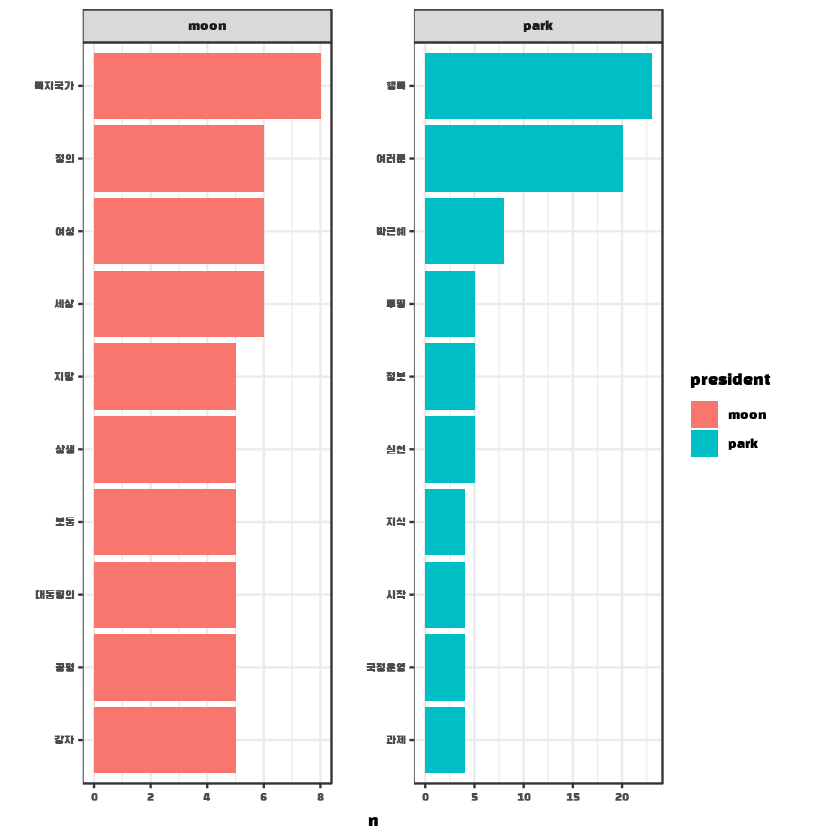

In [100]:
ggplot(top10, aes(reorder_within(word, n, president),
                 y = n,
                 fill = president)) + 
    geom_col() + 
    coord_flip() + 
    facet_wrap(~ president, scales = "free") + 
    scale_x_reordered() +
    theme(text = element_text(family = "blackhansans"),
         axis.title.y = element_blank())

### 주요 단어가 사용된 문장 탐색

In [101]:
speeches_sentence <- bind_speeches %>%
    as_tibble() %>%
    unnest_tokens(input = value,
                 output = sentence,
                 token = "sentences")

In [102]:
speeches_sentence %>%
    filter(president == "moon" & str_detect(sentence, "복지국가")) %>% print

# A tibble: 8 x 2
  president sentence                                                            
  <chr>     <chr>                                                               
1 moon      ‘강한 복지국가’를 향해 담대하게 나아가겠습니다.                     
2 moon      2백 년 전 이와 같은 소득재분배, 복지국가의 사상을 가진 위정자가 지~ 
3 moon      이제 우리는 복지국가를 향해 담대하게 나아갈 때입니다.               
4 moon      부자감세, 4대강 사업 같은 시대착오적 과오를 청산하고, 하루빨리 복지~
5 moon      우리는 지금 복지국가로 가느냐, 양극화의 분열된 국가로 가느냐 하는 ~ 
6 moon      강한 복지국가일수록 국가 경쟁력도 더 높습니다.                      
7 moon      결국 복지국가로 가는 길은 사람에 대한 투자, 일자리 창출, 자영업 고~ 
8 moon      우리는 과감히 강한 보편적 복지국가로 가야 합니다.                   


In [103]:
speeches_sentence %>%
    filter(president == "park" & str_detect(sentence, "행복")) %>% print

# A tibble: 19 x 2
   president sentence                                                           
   <chr>     <chr>                                                              
 1 park      저는 오늘, 국민 한 분 한 분의 꿈이 이루어지는 행복한 대한민국을 만~
 2 park      국가는 발전했고, 경제는 성장했다는데, 나의 삶은 나아지지 않았고, ~ 
 3 park      과거에는 국가의 발전이 국민의 행복으로 이어졌습니다.               
 4 park      개인의 창의력이 중요한 지식기반사회에서는 국민 한 사람, 한 사람이 ~
 5 park      이제 국정운영의 패러다임을 국가에서 국민으로, 개인의 삶과 행복 중~ 
 6 park      국민 개개인의 꿈을 향한 노력이 국가를 발전시키고 국가 발전이 국민 ~
 7 park      저는 ‘경제민주화 실현’, ‘일자리 창출’, 그리고 ‘한국형 복지의 ~     
 8 park      국민행복의 길을 열어갈 첫 번째 과제로, 저는 경제민주화를 통해 중소~
 9 park      국민행복의 길을 열어갈 두 번째 과제로, 저는 좋은 일자리 창출을 통~ 
10 park      국민행복의 길을 열어갈 세 번째 과제로, 우리의 실정에 맞으면서 국민~
11 park      저는 국민행복을 위해 ‘경제민주화-일자리-복지’를 아우르는 (가칭)~   
12 park      모든 계층의 국민이 함께 참여해 만들고, 정부와 기업, 지역사회가 함~ 
13 park      50년 전 경제개발 5개년 계획이 산업화의 기적을 이뤄냈듯,‘오천만 국~ 
14 park      저는 지속가능한 국민 행복을 만들 수 있도록,사람에 대한 투자를 적극~
15 park      저 박근혜, 경쟁과 입시에 매몰된 교육을‘함께하는 행복교육’으로 바~  
16 pa

### 중요도가 비슷한 단어 탐색 (오즈비가 1에 가까움)

In [104]:
frequency_wide %>%
    filter(moon >= 5 & park >= 5) %>%
    arrange(abs(1 - odds_ratio)) %>%
    head(10) %>% print

# A tibble: 10 x 6
   word      moon  park ratio_moon ratio_park odds_ratio
   <chr>    <int> <int>      <dbl>      <dbl>      <dbl>
 1 사회        14     9    0.00655    0.00552      1.19 
 2 사람         9     9    0.00436    0.00552      0.791
 3 경제        15    15    0.00698    0.00883      0.791
 4 지원         5     5    0.00262    0.00331      0.791
 5 우리        17    10    0.00786    0.00607      1.29 
 6 불안         7     8    0.00349    0.00496      0.703
 7 산업         9     5    0.00436    0.00331      1.32 
 8 대한민국    11     6    0.00524    0.00386      1.36 
 9 국가         7    10    0.00349    0.00607      0.576
10 교육         6     9    0.00306    0.00552      0.554


### 03-03 로그 오즈비
- 오즈비가 1보다 큰 단어는 양수, 오즈비가 1보다 작은 단어는 음수
- 두 텍스트 중 어디에서 비중이 큰지에 따라 서로 다른 부호를 가짐


$$
log \; odds \;ratio = log({{({n+1 \over total+1})_{Text \;A}} \over {({n+1 \over total+1})_{Text \; B}}})
$$

In [106]:
frequency_wide <- frequency_wide %>%
    mutate(log_odds_ratio = log(odds_ratio)) 

In [109]:
frequency_wide %>%
    arrange(-log_odds_ratio) %>% print

# A tibble: 955 x 7
   word      moon  park ratio_moon ratio_park odds_ratio log_odds_ratio
   <chr>    <int> <int>      <dbl>      <dbl>      <dbl>          <dbl>
 1 복지국가     8     0    0.00393   0.000552       7.12           1.96
 2 세상         6     0    0.00306   0.000552       5.54           1.71
 3 여성         6     0    0.00306   0.000552       5.54           1.71
 4 정의         6     0    0.00306   0.000552       5.54           1.71
 5 강자         5     0    0.00262   0.000552       4.75           1.56
 6 공평         5     0    0.00262   0.000552       4.75           1.56
 7 대통령의     5     0    0.00262   0.000552       4.75           1.56
 8 보통         5     0    0.00262   0.000552       4.75           1.56
 9 상생         5     0    0.00262   0.000552       4.75           1.56
10 지방         5     0    0.00262   0.000552       4.75           1.56
# ... with 945 more rows


In [110]:
frequency_wide %>%
    arrange(log_odds_ratio) %>% print

# A tibble: 955 x 7
   word      moon  park ratio_moon ratio_park odds_ratio log_odds_ratio
   <chr>    <int> <int>      <dbl>      <dbl>      <dbl>          <dbl>
 1 박근혜       0     8   0.000436    0.00496     0.0879          -2.43
 2 여러분       2    20   0.00131     0.0116      0.113           -2.18
 3 행복         3    23   0.00175     0.0132      0.132           -2.03
 4 실천         0     5   0.000436    0.00331     0.132           -2.03
 5 정보         0     5   0.000436    0.00331     0.132           -2.03
 6 투명         0     5   0.000436    0.00331     0.132           -2.03
 7 과제         0     4   0.000436    0.00276     0.158           -1.84
 8 국정운영     0     4   0.000436    0.00276     0.158           -1.84
 9 시작         0     4   0.000436    0.00276     0.158           -1.84
10 지식         0     4   0.000436    0.00276     0.158           -1.84
# ... with 945 more rows


In [111]:
frequency_wide %>%
    arrange(abs(log_odds_ratio)) %>% print

# A tibble: 955 x 7
   word    moon  park ratio_moon ratio_park odds_ratio log_odds_ratio
   <chr>  <int> <int>      <dbl>      <dbl>      <dbl>          <dbl>
 1 때문       4     3    0.00218    0.00221      0.989        -0.0109
 2 강화       3     2    0.00175    0.00165      1.06          0.0537
 3 부담       3     2    0.00175    0.00165      1.06          0.0537
 4 세계       3     2    0.00175    0.00165      1.06          0.0537
 5 책임       3     2    0.00175    0.00165      1.06          0.0537
 6 협력       3     2    0.00175    0.00165      1.06          0.0537
 7 거대       2     1    0.00131    0.00110      1.19          0.171 
 8 교체       2     1    0.00131    0.00110      1.19          0.171 
 9 근본적     2     1    0.00131    0.00110      1.19          0.171 
10 기반       2     1    0.00131    0.00110      1.19          0.171 
# ... with 945 more rows


### 로그 오즈비를 이용하여 중요 단어 비교

In [115]:
top10 <- frequency_wide %>%
  group_by(president = ifelse(log_odds_ratio > 0, "moon", "park")) %>%
  slice_max(abs(log_odds_ratio), n = 10, with_ties = F)

top10 %>% 
  arrange(-log_odds_ratio) %>% 
  select(word, log_odds_ratio, president) %>% print

# A tibble: 20 x 3
# Groups:   president [2]
   word     log_odds_ratio president
   <chr>             <dbl> <chr>    
 1 복지국가           1.96 moon     
 2 세상               1.71 moon     
 3 여성               1.71 moon     
 4 정의               1.71 moon     
 5 강자               1.56 moon     
 6 공평               1.56 moon     
 7 대통령의           1.56 moon     
 8 보통               1.56 moon     
 9 상생               1.56 moon     
10 지방               1.56 moon     
11 과제              -1.84 park     
12 국정운영          -1.84 park     
13 시작              -1.84 park     
14 지식              -1.84 park     
15 행복              -2.03 park     
16 실천              -2.03 park     
17 정보              -2.03 park     
18 투명              -2.03 park     
19 여러분            -2.18 park     
20 박근혜            -2.43 park     


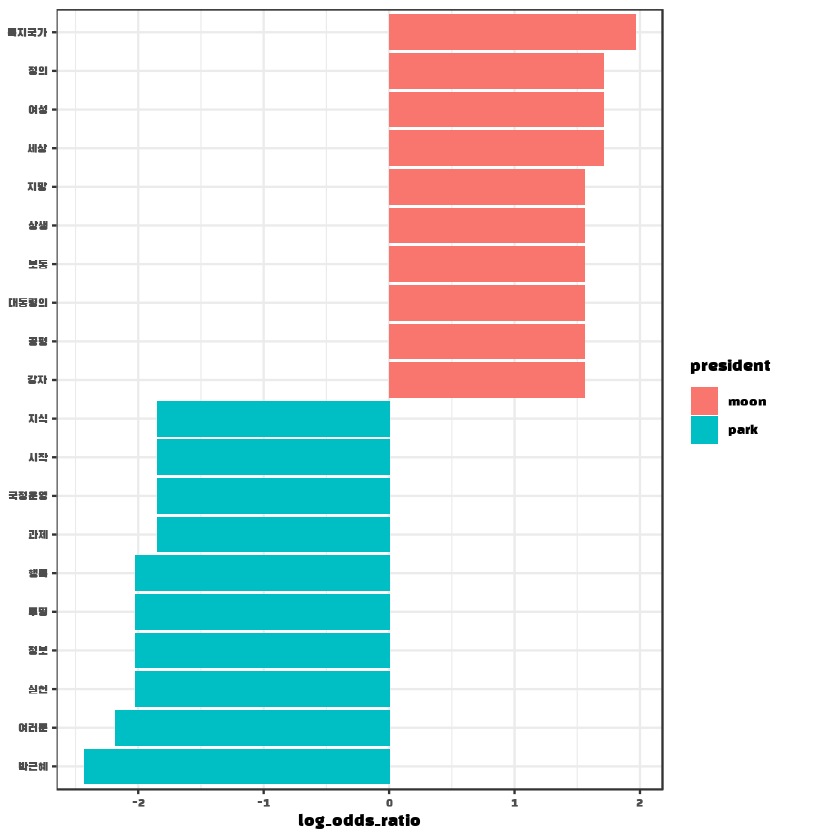

In [117]:
ggplot(top10, aes(x = fct_reorder(word, log_odds_ratio),
                  y = log_odds_ratio,
                  fill = president)) +
  geom_col() +
  coord_flip() +
  labs(x = NULL) +
  theme(text = element_text(family = "blackhansans"))

### 03-04 TF-IDF 여러 텍스트의 단어 비교 (셋 이상의 텍스트)

### TF-IDF(Term Frequency - Inverse Document Frequency) 
- 어떤 단어가 흔하지 않으면서도 특정 텍스트에서는 자주 사용된 정도

#### TF : 특정 텍스트에서의 단어 빈도
#### DF : 단어가 사용된 텍스트 수 '문서 빈도', DF가 클수록 여러 문서에 흔하게 사용된 일반적인 단어
#### IDF : 전체 문서 수(N)에서 DF가 차지하는 비중을 구하고, 그 값의 역수에 로그를 취함 (역문서 빈도)

$$
IDF = log{N \over DF}
$$

- IDF는 DF의 역수이므로, DF가 클수록 작아지고, DF가 작을수록 커짐
- **IDF가 클수록 드물게 사용되는 특이한 단어, 작을수록 흔하게 사용되는 일반적 단어**

#### TF-IDF : 어떤 단어가 분석 대상이 되는 텍스트 내에서 많이 사용될수록 커지고, 동시에 해당 단어가 사용된 텍스트가 드물수록 커짐

### 즉 "흔하지 않은 단어인데 특정 텍스트에서 자주 사용될수록 큰 값"

$$
TF-IDF = TF \; X \;log{N \over DF}
$$

#### - 모든 문서에 사용된 단어는 IDF가 0이므로 TF-IDF도 0이 됨, 따라서 TF-IDF를 활용하면 어떤 단어가 특정 문서에 특출나게 많이 사용되더라도 모든 문서에 사용되면 발견 할 수 없는 한계가 존재

### TF-IDF 구하기

In [118]:
library(readr)

In [127]:
setwd("C:/Soongsil/R/Textmining")

In [129]:
raw_speeches <- read_csv("speeches_presidents.csv")
raw_speeches %>% print

Rows: 4 Columns: 2
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): president, value

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 4 x 2
  president value                                                               
  <chr>     <chr>                                                               
1 문재인    "정권교체 하겠습니다!   정치교체 하겠습니다!   시대교체 하겠습니다!~
2 박근혜    "존경하는 국민 여러분! 저는 오늘, 국민 한 분 한 분의 꿈이 이루어지~ 
3 이명박    "존경하는 국민 여러분, 사랑하는 한나라당 당원 동지 여러분! 저는 오~ 
4 노무현    "어느때인가 부터 제가 대통령이 되겠다고 말을 하기 시작했습니다. 많~ 


In [132]:
speeches <- raw_speeches %>%
    mutate(value = str_replace_all(value, "[^가-힣]", " "),
          value = str_squish(value))

speeches <- speeches %>%
    unnest_tokens(input = value,
                 output = word,
                 token = extractNoun)

frequency <- speeches %>%
    count(president, word) %>%
    filter(str_count(word) > 1)

frequency %>% print

# A tibble: 1,513 x 3
   president word      n
   <chr>     <chr> <int>
 1 노무현    가슴      2
 2 노무현    가훈      2
 3 노무현    갈등      1
 4 노무현    감옥      1
 5 노무현    강자      1
 6 노무현    개편      4
 7 노무현    개혁      4
 8 노무현    건국      1
 9 노무현    경선      1
10 노무현    경쟁      1
# ... with 1,503 more rows


### ```bind_tf_idf()``` : TF-IDF 계산
- ```term``` : 단어
- ```document``` : 텍스트 구분 기준
- ```n``` : 단어 빈도

In [137]:
frequency <- frequency %>%
    bind_tf_idf(term = word,
               document = president,
               n = n) %>%
    arrange(-tf_idf)

frequency %>% print

# A tibble: 1,513 x 6
   president word         n      tf   idf tf_idf
   <chr>     <chr>    <int>   <dbl> <dbl>  <dbl>
 1 노무현    공식         6 0.0163  1.39  0.0227
 2 노무현    비젼         6 0.0163  1.39  0.0227
 3 노무현    정계         6 0.0163  1.39  0.0227
 4 이명박    리더십       6 0.0158  1.39  0.0219
 5 노무현    권력         9 0.0245  0.693 0.0170
 6 노무현    개편         4 0.0109  1.39  0.0151
 7 이명박    당원         4 0.0105  1.39  0.0146
 8 이명박    동지         4 0.0105  1.39  0.0146
 9 이명박    일류국가     4 0.0105  1.39  0.0146
10 박근혜    박근혜       8 0.00962 1.39  0.0133
# ... with 1,503 more rows


In [140]:
frequency %>% filter(president == "문재인") %>% print
frequency %>% filter(president == "박근혜") %>% print
frequency %>% filter(president == "이명박") %>% print
frequency %>% filter(president == "노무현") %>% print

# A tibble: 688 x 6
   president word         n      tf   idf  tf_idf
   <chr>     <chr>    <int>   <dbl> <dbl>   <dbl>
 1 문재인    복지국가     8 0.00608 1.39  0.00843
 2 문재인    여성         6 0.00456 1.39  0.00633
 3 문재인    공평         5 0.00380 1.39  0.00527
 4 문재인    담쟁이       5 0.00380 1.39  0.00527
 5 문재인    대통령의     5 0.00380 1.39  0.00527
 6 문재인    보통         5 0.00380 1.39  0.00527
 7 문재인    상생         5 0.00380 1.39  0.00527
 8 문재인    우리나라    10 0.00760 0.693 0.00527
 9 문재인    지방         5 0.00380 1.39  0.00527
10 문재인    확대        10 0.00760 0.693 0.00527
# ... with 678 more rows
# A tibble: 407 x 6
   president word         n      tf   idf  tf_idf
   <chr>     <chr>    <int>   <dbl> <dbl>   <dbl>
 1 박근혜    박근혜       8 0.00962 1.39  0.0133 
 2 박근혜    정보         5 0.00601 1.39  0.00833
 3 박근혜    투명         5 0.00601 1.39  0.00833
 4 박근혜    행복        23 0.0276  0.288 0.00795
 5 박근혜    교육         9 0.0108  0.693 0.00750
 6 박근혜    국정운영     4 0.00481 1.39  0.00666
 7 박근혜    정부        17 0.

### 그래프

In [155]:
top10 <- frequency %>%
    group_by(president) %>%
    slice_max(tf_idf, n = 10, with_ties = F)

top10$president <- factor(top10$president,
                          levels = c("문재인", "박근혜", "이명박", "노무현"))

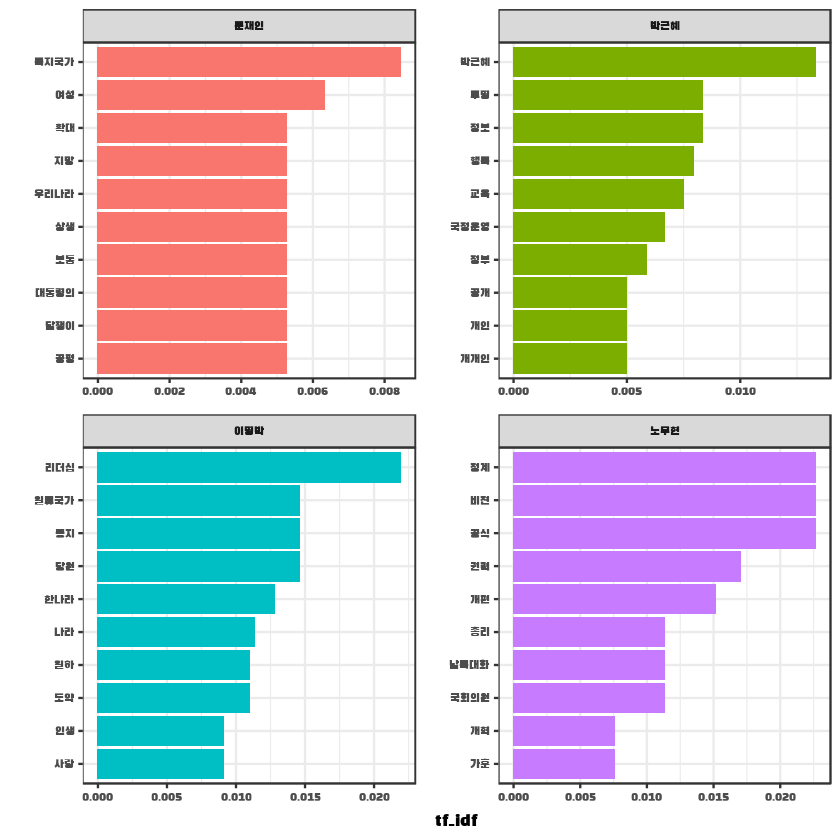

In [156]:
ggplot(top10, aes(reorder_within(word, tf_idf, president),
                 tf_idf,
                 fill = president)) + 
    geom_col(show.legend = F) + 
    coord_flip() + 
    facet_wrap(~ president, scales = "free", ncol = 2) +
    scale_x_reordered() + 
    theme(text = element_text(family = "blackhansans"),
         axis.title.y = element_blank())

### 가중치 로그 오즈
library(tidylo)

https://github.com/juliasilge/tidylo

### Q1.1

In [168]:
raw_speeches <- read_csv("speeches_presidents.csv")
raw_speeches <- raw_speeches %>% filter(president %in% c("이명박", "노무현"))
raw_speeches %>% print

Rows: 4 Columns: 2
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): president, value

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 2 x 2
  president value                                                              
  <chr>     <chr>                                                              
1 이명박    "존경하는 국민 여러분, 사랑하는 한나라당 당원 동지 여러분! 저는 오~
2 노무현    "어느때인가 부터 제가 대통령이 되겠다고 말을 하기 시작했습니다. 많~


In [172]:
speeches <- raw_speeches %>%
    mutate(value = str_replace_all(value, "[^가-힣]", " "),
          value = str_squish(value))

speeches <- speeches %>%
    unnest_tokens(input = value,
                 output = word,
                 token = extractNoun)

speeches %>% print

# A tibble: 1,002 x 2
   president word  
   <chr>     <chr> 
 1 이명박    존경  
 2 이명박    하    
 3 이명박    국민  
 4 이명박    여러분
 5 이명박    사랑  
 6 이명박    하    
 7 이명박    한나라
 8 이명박    당    
 9 이명박    당원  
10 이명박    동지  
# ... with 992 more rows


### Q1.2

In [175]:
frequency <- speeches %>%
    count(president, word) %>%
    filter(str_count(word) > 1)

In [176]:
df_wide <- frequency %>%
    pivot_wider(names_from = president,
               values_from = n,
               values_fill = c(0))

df_wide %>% print

# A tibble: 382 x 3
   word  노무현 이명박
   <chr>  <int>  <int>
 1 가슴       2      0
 2 가훈       2      0
 3 갈등       1      0
 4 감옥       1      0
 5 강자       1      0
 6 개편       4      0
 7 개혁       4      0
 8 건국       1      0
 9 경선       1      0
10 경쟁       1      3
# ... with 372 more rows


### Q1.3

In [183]:
frequency_wide <- df_wide %>%
  mutate(ratio_no = ((노무현 + 1) / (sum(이명박 + 1))),  
         ratio_lee = ((이명박 + 1) / (sum(노무현 + 1))),  
         odds_ratio = (ratio_no / ratio_lee),
         log_odds_ratio = log(odds_ratio)) %>%
    arrange(-log_odds_ratio)
        
frequency_wide %>% print

# A tibble: 382 x 7
   word  노무현 이명박 ratio_no ratio_lee odds_ratio log_odds_ratio
   <chr>  <int>  <int>    <dbl>     <dbl>      <dbl>          <dbl>
 1 권력       9      0  0.0131    0.00134       9.83           2.29
 2 정치       8      0  0.0118    0.00134       8.85           2.18
 3 공식       6      0  0.00919   0.00134       6.88           1.93
 4 비젼       6      0  0.00919   0.00134       6.88           1.93
 5 정계       6      0  0.00919   0.00134       6.88           1.93
 6 개편       4      0  0.00656   0.00134       4.91           1.59
 7 개혁       4      0  0.00656   0.00134       4.91           1.59
 8 당당       4      0  0.00656   0.00134       4.91           1.59
 9 정의       4      0  0.00656   0.00134       4.91           1.59
10 지역       4      0  0.00656   0.00134       4.91           1.59
# ... with 372 more rows


In [184]:
top10 <- frequency_wide %>%
  group_by(president = ifelse(log_odds_ratio > 0, "no", "lee")) %>%
  slice_max(abs(log_odds_ratio), n = 10, with_ties = F)

top10 %>% 
  arrange(-log_odds_ratio) %>% 
  select(word, log_odds_ratio, president) %>% print

# A tibble: 20 x 3
# Groups:   president [2]
   word     log_odds_ratio president
   <chr>             <dbl> <chr>    
 1 권력               2.29 no       
 2 정치               2.18 no       
 3 공식               1.93 no       
 4 비젼               1.93 no       
 5 정계               1.93 no       
 6 개편               1.59 no       
 7 개혁               1.59 no       
 8 당당               1.59 no       
 9 정의               1.59 no       
10 지역               1.59 no       
11 당원              -1.63 lee      
12 여러분            -1.81 lee      
13 국가              -1.81 lee      
14 발전              -1.81 lee      
15 사랑              -1.81 lee      
16 인생              -1.81 lee      
17 세계              -1.96 lee      
18 리더십            -1.96 lee      
19 대한민국          -2.58 lee      
20 나라              -2.79 lee      


### Q1.4

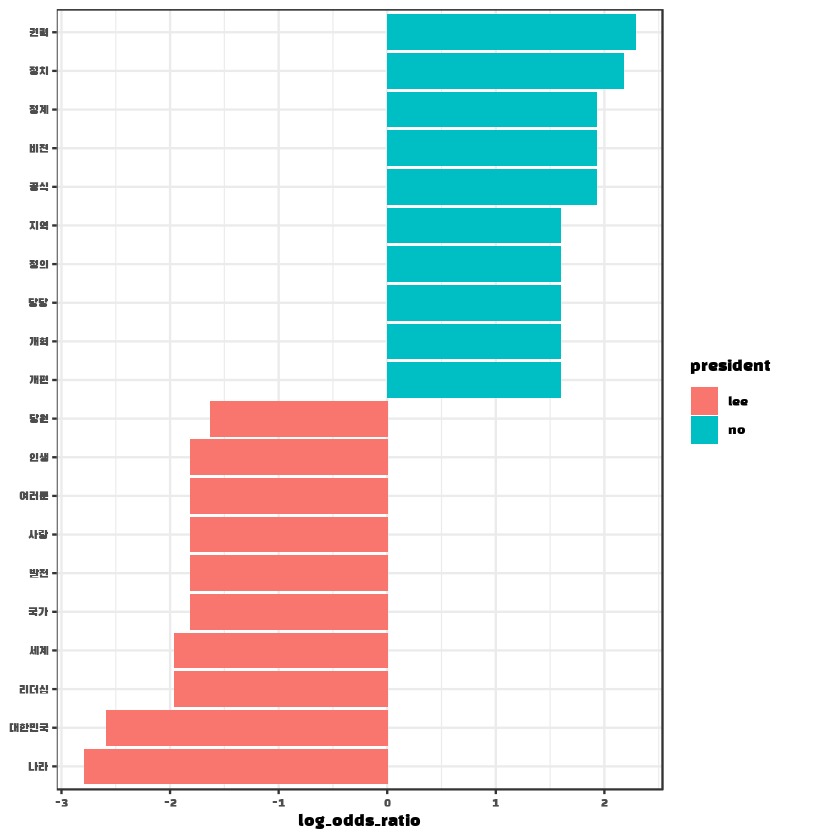

In [185]:
ggplot(top10, aes(x = fct_reorder(word, log_odds_ratio),
                  y = log_odds_ratio,
                  fill = president)) +
  geom_col() +
  coord_flip() +
  labs(x = NULL) +
  theme(text = element_text(family = "blackhansans"))

### Q2.1

In [194]:
raw_speeches <- read_csv("inaugural_address.csv")
raw_speeches %>% print

Rows: 4 Columns: 2
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): president, value

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 4 x 2
  president value                                                               
  <chr>     <chr>                                                               
1 문재인    국민께 드리는 말씀  존경하고 사랑하는 국민 여러분, 감사합니다. 국민~
2 박근혜    희망의 새 시대를 열겠습니다.     존경하는 국민여러분! 700만 해외동~ 
3 이명박    존경하는 국민 여러분!    700만 해외동포 여러분!    이 자리에 참석하~
4 노무현    존경하는 국민 여러분.  오늘 저는 대한민국의 제16대 대통령에 취임하~ 


In [197]:
speeches <- raw_speeches %>%
    mutate(value = str_replace_all(value, "[^가-힣]", " "),
          value = str_squish(value))

speeches <- speeches %>%
    unnest_tokens(input = value,
                 output = word,
                 token = extractNoun)

frequency <- speeches %>%
    count(president, word) %>%
    filter(str_count(word) > 1)

frequency %>% print

# A tibble: 1,657 x 3
   president word       n
   <chr>     <chr>  <int>
 1 노무현    가난       1
 2 노무현    가능       1
 3 노무현    가일       1
 4 노무현    가지       1
 5 노무현    각국       1
 6 노무현    갈등       1
 7 노무현    갈림길     1
 8 노무현    감사       4
 9 노무현    강구       2
10 노무현    강국       1
# ... with 1,647 more rows


### Q2.2

In [198]:
frequency <- frequency %>%
    bind_tf_idf(term = word,
               document = president,
               n = n) %>%
    arrange(-tf_idf)

frequency %>% print

# A tibble: 1,657 x 6
   president word         n      tf   idf  tf_idf
   <chr>     <chr>    <int>   <dbl> <dbl>   <dbl>
 1 박근혜    행복        21 0.0279  0.693 0.0193 
 2 노무현    동북아      18 0.0231  0.693 0.0160 
 3 박근혜    창조경제     8 0.0106  1.39  0.0147 
 4 노무현    번영         6 0.00770 1.39  0.0107 
 5 문재인    머리         3 0.00711 1.39  0.00986
 6 문재인    문재인       3 0.00711 1.39  0.00986
 7 이명박    선진화       8 0.00668 1.39  0.00927
 8 박근혜    개개인       5 0.00663 1.39  0.00919
 9 박근혜    경제부흥     5 0.00663 1.39  0.00919
10 박근혜    희망        10 0.0133  0.693 0.00919
# ... with 1,647 more rows


In [199]:
frequency %>% filter(president == "문재인") %>% print
frequency %>% filter(president == "박근혜") %>% print
frequency %>% filter(president == "이명박") %>% print
frequency %>% filter(president == "노무현") %>% print

# A tibble: 243 x 6
   president word         n      tf   idf  tf_idf
   <chr>     <chr>    <int>   <dbl> <dbl>   <dbl>
 1 문재인    머리         3 0.00711 1.39  0.00986
 2 문재인    문재인       3 0.00711 1.39  0.00986
 3 문재인    대통령의     5 0.0118  0.693 0.00821
 4 문재인    선거         5 0.0118  0.693 0.00821
 5 문재인    세상         5 0.0118  0.693 0.00821
 6 문재인    광화문       2 0.00474 1.39  0.00657
 7 문재인    권력         2 0.00474 1.39  0.00657
 8 문재인    권력기관     2 0.00474 1.39  0.00657
 9 문재인    말씀         2 0.00474 1.39  0.00657
10 문재인    빈손         2 0.00474 1.39  0.00657
# ... with 233 more rows
# A tibble: 348 x 6
   president word         n      tf   idf  tf_idf
   <chr>     <chr>    <int>   <dbl> <dbl>   <dbl>
 1 박근혜    행복        21 0.0279  0.693 0.0193 
 2 박근혜    창조경제     8 0.0106  1.39  0.0147 
 3 박근혜    개개인       5 0.00663 1.39  0.00919
 4 박근혜    경제부흥     5 0.00663 1.39  0.00919
 5 박근혜    희망        10 0.0133  0.693 0.00919
 6 박근혜    융성         4 0.00531 1.39  0.00735
 7 박근혜    융합         4 0.0

### Q2.3

In [200]:
top10 <- frequency %>%
    group_by(president) %>%
    slice_max(tf_idf, n = 10, with_ties = F)

top10$president <- factor(top10$president,
                          levels = c("문재인", "박근혜", "이명박", "노무현"))

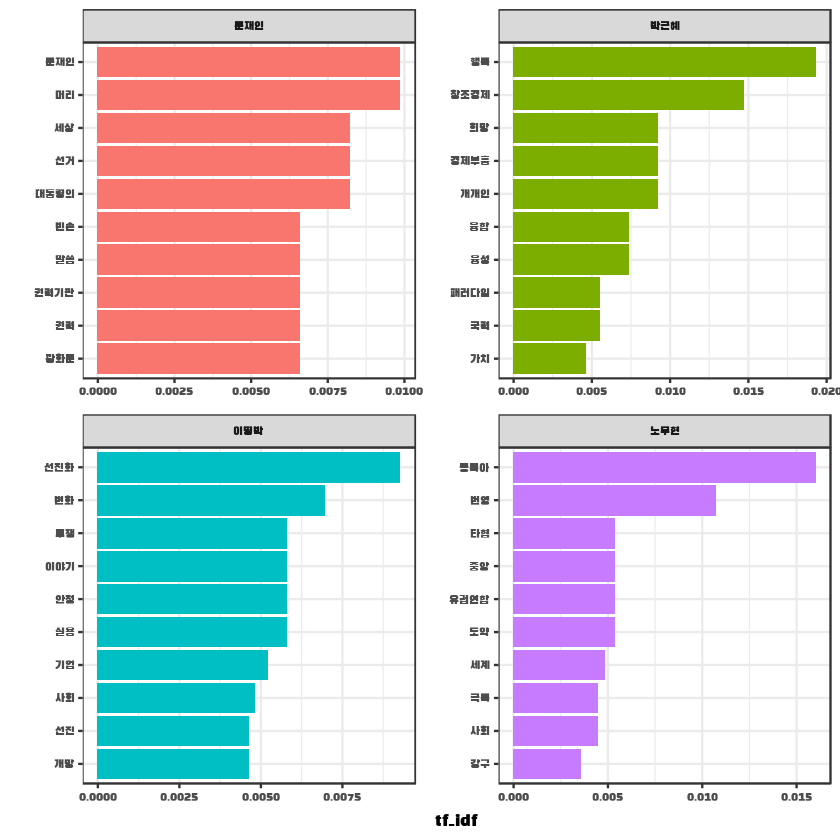

In [201]:
ggplot(top10, aes(reorder_within(word, tf_idf, president),
                 tf_idf,
                 fill = president)) + 
    geom_col(show.legend = F) + 
    coord_flip() + 
    facet_wrap(~ president, scales = "free", ncol = 2) +
    scale_x_reordered() + 
    theme(text = element_text(family = "blackhansans"),
         axis.title.y = element_blank())